In [34]:
from __future__ import unicode_literals
import time
import tweepy
import os
import os.path
import pandas as pd
import csv
import networkx as nx
import matplotlib.pyplot as plt
import collections

ckey='ruFHMzXN6rimxkKzd9FtwD4QJ'
c_secret='4YaYRcKp7U0mXAeUXAQMd8kRjbSCPpSKTatPK7hZFIquJ7hP01'
atoken='983706800309653504-056QBrRGtjrRIDdy6iYk3d5XdePB4eL'
atokensecret='13ra5wBqqHCDQfsfD8NqsyYmbmgeXkiOT6eZThs3eK0mh'
auth = tweepy.OAuthHandler(ckey, c_secret)
auth.set_access_token(atoken, atokensecret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [35]:
def find_followers(twit_handle,current_depth=0, max_depth=1):
    twit_id= api.get_user(screen_name = "twit_handle")
    ids = []
    fname = 'twit_id' + '.csv'
    if os.path.isfile(fname):
        #print("This file exists")
        with open(fname) as f:
            reader = csv.reader(f)
            l = list(reader)
        ids = [item for sublist in l for item in sublist]
    else:
        for page in tweepy.Cursor(api.friends_ids, screen_name=twit_handle).pages():
            ids.extend(page)
        df = pd.DataFrame(ids)
        df.to_csv(fname, sep=',', header=None, index=None)
        
    #find friends of friends 
    #cd=current_depth
    #if (cd +1) < max_depth:
        #for fid in ids:
            #find_followers(fid, current_depth=cd+1, max_depth=max_depth)
      
    return ids

In [36]:
screen_name= 'ajitpaifcc'
user= api.get_user(screen_name = "%s" % screen_name)
follow_list = find_followers("%s" % screen_name)
screen_name2= 'jrosenworcel'
user2= api.get_user(screen_name = "%s" % screen_name2)
follow_list2= find_followers("%s" % screen_name2)
screen_name3= 'mikeofcc'
user3= api.get_user(screen_name = "%s" % screen_name3)
follow_list3= find_followers("%s" % screen_name3)
screen_name4= 'demonbarber41'
user4= api.get_user(screen_name = "%s" % screen_name4)
follow_list4= find_followers("%s" % screen_name4)

In [37]:
G = nx.Graph()
for f in follow_list:
    G.add_edge(user, f, weight=.1)
for h in follow_list2:
    G.add_edge(user2, h,weight=.1)
for i in follow_list3:
    G.add_edge(user3, i,weight=.1)
for j in follow_list4:
    G.add_edge(user4, j,weight=.1)

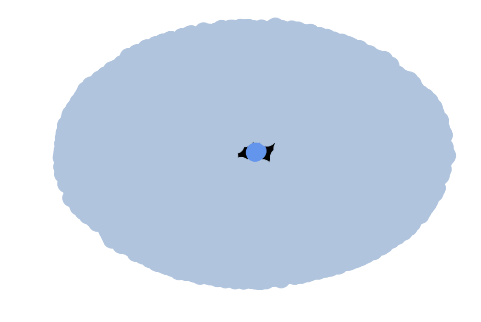

In [38]:
def color_graph(graph):
    color_map=[]
    node_list = list(graph.nodes)
    for i in range(0,len(node_list)):
        if graph.degree(node_list[i]) == 1:
            color_map.append('lightslategrey')
        elif graph.degree(node_list[i])==2:
            color_map.append('aliceblue')
        elif graph.degree(node_list[i])==3:
            color_map.append('dodgerblue')
        elif graph.degree(node_list[i])==4:
            color_map.append('lightsteelblue')
        else:
            color_map.append('cornflowerblue')
    nx.draw(graph,node_color=color_map)
    plt.show()
color_graph(G)

In [39]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
print(deg,cnt)

(3910, 4) (4, 3910)


Text(0.5,0,'Degree')

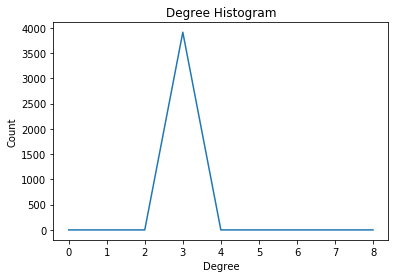

In [40]:
fig, ax = plt.subplots()
plt.plot(nx.degree_histogram(G)[1:10])

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")